# Imports

In [1]:
from lightning_sdk import Studio, Teamspace, User, Organization

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import brain_score_helper
from brain_score_helper import *

In [5]:
import sys
print(sys.executable)

/home/zeus/miniconda3/envs/cloudspace/bin/python


In [8]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install brainscore_vision

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install git+https://github.com/harvard-visionlab/neuroai-kit.git

  Cloning https://github.com/harvard-visionlab/neuroai-kit.git to /tmp/pip-req-build-vulnzdp6
  Running command git clone --filter=blob:none --quiet https://github.com/harvard-visionlab/neuroai-kit.git /tmp/pip-req-build-vulnzdp6

  Resolved https://github.com/harvard-visionlab/neuroai-kit.git to commit bbd16274b08ee9cb05aec57da034c7b49a6c635e
  Preparing metadata (setup.py) ... done
  Created wheel for neuroai_kit: filename=neuroai_kit-0.1.2-py3-none-any.whl size=10848 sha256=dea1a8ff12859da5bded141df1641e8127854a3fe7d4b30f9e3c5a4c4a8acb89
  Stored in directory: /tmp/pip-ephem-wheel-cache-qlquc292/wheels/89/36/c6/dc6948d52137f2453f5028b30a43ac66a4d2256c8aa3079305
Successfully built neuroai_kit
Note: you may need to restart the kernel to use updated packages.


In [26]:
import brainscore_vision


In [27]:
import numpy as numpy
#import matplotlib.pyplot as plt


from brainscore_vision import load_model, load_stimulus_set
from brainscore_vision.model_interface import BrainModel

# Let see if we can load the top 3 models!

In [27]:
'''Model 1: convnext_large'''
#from brainscore_vision import load_model
convnext_large = load_model("convnext_large_mlp:clip_laion2b_augreg_ft_in1k_384")
convnext_large

Model convnext_large_mlp loaded


In [28]:
import torch 

model = convnext_large.activations_model._model
x = torch.randn(5,3,224,224)
model.eval()
with torch.no_grad():
    out = model(x)
x.shape, out.shape

(torch.Size([5, 3, 224, 224]), torch.Size([5, 1000]))

In [33]:
model.__class__

timm.models.convnext.ConvNeXt

In [31]:
import timm 
timm.__version__
data_config = timm.data.resolve_model_data_config(model)
data_config

{'input_size': (3, 384, 384),
 'interpolation': 'bicubic',
 'mean': (0.48145466, 0.4578275, 0.40821073),
 'std': (0.26862954, 0.26130258, 0.27577711),
 'crop_pct': 1.0,
 'crop_mode': 'squash'}

In [24]:
brainscore_model = load_model("alexnet")
convnext_large

/home/zeus/miniconda3/envs/cloudspace/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/zeus/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 55.1MB/s] 


In [26]:
brainscore_model.activations_model.image_size

224

In [4]:
print(dir(convnext_large))

['RecordingTarget', 'Task', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_logger', '_visual_degrees', 'activations_model', 'behavior_model', 'do_behavior', 'identifier', 'layer_model', 'layers', 'load_region_layer_map_json', 'look_at', 'start_recording', 'start_task', 'visual_degrees']


In [6]:
print(type(convnext_large.activations_model))
print(dir(convnext_large.activations_model))

<class 'brainscore_vision.model_helpers.activations.pytorch.PytorchWrapper'>
['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_extractor', '_device', '_extractor', '_forward_kwargs', '_model', '_output_layer', '_tensor_to_numpy', 'from_paths', 'from_stimulus_set', 'get_activations', 'get_layer', 'graph', 'identifier', 'layers', 'register_batch_activations_hook', 'register_hook', 'register_stimulus_set_hook']


In [28]:
print(convnext_large.activations_model._sizeof_)

AttributeError: 'PytorchWrapper' object has no attribute '_sizeof_'

In [18]:
# can i find original model
# print(convnext_large.activations_model._model)
underlying_model = convnext_large.activations_model._model

In [10]:
# print(convnext_large.activations_model)

ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=192, out_features=768, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Linear(in_features=768, out_features=192, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), g

In [19]:
# import neuroai_kit as nk
# from neuroai_kit import model_utils
# from neuroai_kit.electrode import NeuroElectrodeArray

# layers = {
#     'stem': 'stem',
#     'stages': ['stages.0', 'stages.1', 'stages.2', 'stages.3'],
#     'blocks': {
#         'stages.0': [f'stages.0.blocks.{i}' for i in range(3)],
#         'stages.1': [f'stages.1.blocks.{i}' for i in range(3)],
#         'stages.2': [f'stages.2.blocks.{i}' for i in range(27)],
#         'stages.3': [f'stages.3.blocks.{i}' for i in range(3)]
#     },
#     'head': 'head'
# }

# # Using NeuroElectrodeArray directly:
# with NeuroElectrodeArray(underlying_model, layers=layers) as electrode:
#     activations = electrode(input_tensor)

KeyError: 'blocks'

In [24]:
import torch
from neuroai_kit.electrode import NeuroElectrodeArray

# Get the underlying PyTorch model
underlying_model = convnext_large.activations_model._model

# Function to get all named modules as flattened paths
def get_all_layers(model):
    return [name for name, _ in model.named_modules() if name != '']  # Skip the root module

# Get all layer paths
all_layers = get_all_layers(underlying_model)

# Print all available layers to inspect
print(f"Total layers found: {len(all_layers)}")
for i, layer in enumerate(all_layers):
    print(f"{i}: {layer}")

Total layers found: 466
0: stem
1: stem.0
2: stem.1
3: stages
4: stages.0
5: stages.0.downsample
6: stages.0.blocks
7: stages.0.blocks.0
8: stages.0.blocks.0.conv_dw
9: stages.0.blocks.0.norm
10: stages.0.blocks.0.mlp
11: stages.0.blocks.0.mlp.fc1
12: stages.0.blocks.0.mlp.act
13: stages.0.blocks.0.mlp.drop1
14: stages.0.blocks.0.mlp.norm
15: stages.0.blocks.0.mlp.fc2
16: stages.0.blocks.0.mlp.drop2
17: stages.0.blocks.0.shortcut
18: stages.0.blocks.0.drop_path
19: stages.0.blocks.1
20: stages.0.blocks.1.conv_dw
21: stages.0.blocks.1.norm
22: stages.0.blocks.1.mlp
23: stages.0.blocks.1.mlp.fc1
24: stages.0.blocks.1.mlp.act
25: stages.0.blocks.1.mlp.drop1
26: stages.0.blocks.1.mlp.norm
27: stages.0.blocks.1.mlp.fc2
28: stages.0.blocks.1.mlp.drop2
29: stages.0.blocks.1.shortcut
30: stages.0.blocks.1.drop_path
31: stages.0.blocks.2
32: stages.0.blocks.2.conv_dw
33: stages.0.blocks.2.norm
34: stages.0.blocks.2.mlp
35: stages.0.blocks.2.mlp.fc1
36: stages.0.blocks.2.mlp.act
37: stages.0.blo

In [4]:
import torch
from neuroai_kit.electrode import NeuroElectrodeArray

# Assuming convnext_large is already defined and loaded somewhere else
# Get the underlying PyTorch model from the wrapper
underlying_model = convnext_large.activations_model._model  # Adjust as needed

# Build the flattened list of layers to extract activations from:
layers = []

# 1. Add the stem layer
layers.append('stem')

# 2. Add stages and block-level layers
for stage_idx in range(4):  # stages 0, 1, 2, 3
    stage_name = f"stages.{stage_idx}"
    layers.append(stage_name)  # Include the whole stage if needed
    
    # Determine the number of blocks: stage 2 has 27 blocks, others have 3 each.
    num_blocks = 27 if stage_idx == 2 else 3
    for block_idx in range(num_blocks):
        block_prefix = f"{stage_name}.blocks.{block_idx}"
        # Add key activation points from each block:
        # MLP activation, normalization, and optionally the entire block output.
        layers.append(f"{block_prefix}.mlp.act")
        layers.append(f"{block_prefix}.norm")
        layers.append(block_prefix)

# 3. Add the head of the model
layers.append('head')

# Verify that each module exists in the model:
model_modules = dict(underlying_model.named_modules())
for layer in layers:
    if layer not in model_modules:
        print(f"Warning: {layer} not found in the model!")
    # You could also choose to remove it or handle it differently if needed.

# Create an input tensor for testing (e.g., a random image tensor of size 224x224)
input_tensor = torch.randn(1, 3, 224, 224)

# Use NeuroElectrodeArray to extract activations from the specified layers:
with NeuroElectrodeArray(underlying_model, layers=layers) as electrode:
    activations = electrode(input_tensor)

# Print the activation shapes for verification:
for layer_name, activation in activations.items():
    print(f"Layer: {layer_name}, Shape: {activation.shape}")


Layer: stem, Shape: torch.Size([1, 192, 56, 56])
Layer: stages.0, Shape: torch.Size([1, 192, 56, 56])
Layer: stages.0.blocks.0.mlp.act, Shape: torch.Size([1, 56, 56, 768])
Layer: stages.0.blocks.0.norm, Shape: torch.Size([1, 56, 56, 192])
Layer: stages.0.blocks.0, Shape: torch.Size([1, 192, 56, 56])
Layer: stages.0.blocks.1.mlp.act, Shape: torch.Size([1, 56, 56, 768])
Layer: stages.0.blocks.1.norm, Shape: torch.Size([1, 56, 56, 192])
Layer: stages.0.blocks.1, Shape: torch.Size([1, 192, 56, 56])
Layer: stages.0.blocks.2.mlp.act, Shape: torch.Size([1, 56, 56, 768])
Layer: stages.0.blocks.2.norm, Shape: torch.Size([1, 56, 56, 192])
Layer: stages.0.blocks.2, Shape: torch.Size([1, 192, 56, 56])
Layer: stages.1, Shape: torch.Size([1, 384, 28, 28])
Layer: stages.1.blocks.0.mlp.act, Shape: torch.Size([1, 28, 28, 1536])
Layer: stages.1.blocks.0.norm, Shape: torch.Size([1, 28, 28, 384])
Layer: stages.1.blocks.0, Shape: torch.Size([1, 384, 28, 28])
Layer: stages.1.blocks.1.mlp.act, Shape: torch.S

In [22]:
underlying_model = convnext_large.activations_model._model

In [24]:
import neuroai_kit as nk
# now adding my images
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(f"Using device: {device}")
# Load dataset
dataset_path = "s3://visionlab-litdata/exploring-objects-images/"
# moves imgs to GPU before running loops to extract activations
img_batch = load_data(dataset_path)# this moves images to GPU early
underlying_model.eval()
with torch.no_grad():    
    with nk.NeuroElectrodeArray(underlying_model, layers) as electrode:
        activations = electrode(img_batch)
for layer_name, act in activations.items():
    print(layer_name, act.shape)


# getting avg brain rdms for this new studio
load_neural_data(filename = '/teamspace/uploads/ExploringObjectsData_SECTORS.mat' )
reliable_betas_dict, rdm_dict = process_brain_data(data, threshold = 0.30, regions =None)
clean_rdm_dict = compute_reliable_rdms(rdm_dict)
#noise_ceiling_dict, avg_rdm_dict = 
noise_ceiling_dict, avg_rdm_dict = new_noise_ceiling(clean_rdm_dict, num_splits=100, seed=42)

# Define base output folder
base_output_folder = "results"
os.makedirs(base_output_folder, exist_ok=True)

# Create subfolder for average brain RDMs by ROI
avg_rdm_folder = os.path.join(base_output_folder, "avg_brain_rdms")
os.makedirs(avg_rdm_folder, exist_ok=True)

# Save avg_rdm_dict: one file per ROI
for roi, avg_rdm in avg_rdm_dict.items():
    output_file = os.path.join(avg_rdm_folder, f"{roi}_avg_rdm.pkl")
    with open(output_file, "wb") as f:
        pickle.dump(avg_rdm, f)
    print(f"Saved avg RDM for {roi} in {output_file}")

# Create subfolder for noise ceiling dictionary by ROI
nc_folder = os.path.join(base_output_folder, "noise_ceiling")
os.makedirs(nc_folder, exist_ok=True)

# Save noise_ceiling_dict: one file per ROI
for roi, noise_ceiling in noise_ceiling_dict.items():
    output_file = os.path.join(nc_folder, f"{roi}_noise_ceiling.pkl")
    with open(output_file, "wb") as f:
        pickle.dump(noise_ceiling, f)
    print(f"Saved noise ceiling for {roi} in {output_file}")


TypeError: conv2d() received an invalid combination of arguments - got (NoneType, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!NoneType!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!NoneType!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)


# saving avg rdms by brain ROI in this new studio

In [10]:
# getting avg brain rdms for this new studio
load_neural_data(filename = '/teamspace/uploads/ExploringObjectsData_SECTORS.mat' )
reliable_betas_dict, rdm_dict = process_brain_data(data, threshold = 0.30, regions =None)
clean_rdm_dict = compute_reliable_rdms(rdm_dict)
#noise_ceiling_dict, avg_rdm_dict = 
noise_ceiling_dict, avg_rdm_dict = new_noise_ceiling(clean_rdm_dict, num_splits=100, seed=42)

# Define base output folder
base_output_folder = "results"
os.makedirs(base_output_folder, exist_ok=True)

# Create subfolder for average brain RDMs by ROI
avg_rdm_folder = os.path.join(base_output_folder, "avg_brain_rdms")
os.makedirs(avg_rdm_folder, exist_ok=True)

# Save avg_rdm_dict: one file per ROI
for roi, avg_rdm in avg_rdm_dict.items():
    output_file = os.path.join(avg_rdm_folder, f"{roi}_avg_rdm.pkl")
    with open(output_file, "wb") as f:
        pickle.dump(avg_rdm, f)
    print(f"Saved avg RDM for {roi} in {output_file}")

# Create subfolder for noise ceiling dictionary by ROI
nc_folder = os.path.join(base_output_folder, "noise_ceiling")
os.makedirs(nc_folder, exist_ok=True)

# Save noise_ceiling_dict: one file per ROI
for roi, noise_ceiling in noise_ceiling_dict.items():
    output_file = os.path.join(nc_folder, f"{roi}_noise_ceiling.pkl")
    with open(output_file, "wb") as f:
        pickle.dump(noise_ceiling, f)
    print(f"Saved noise ceiling for {roi} in {output_file}")

NameError: name 'load_neural_data' is not defined

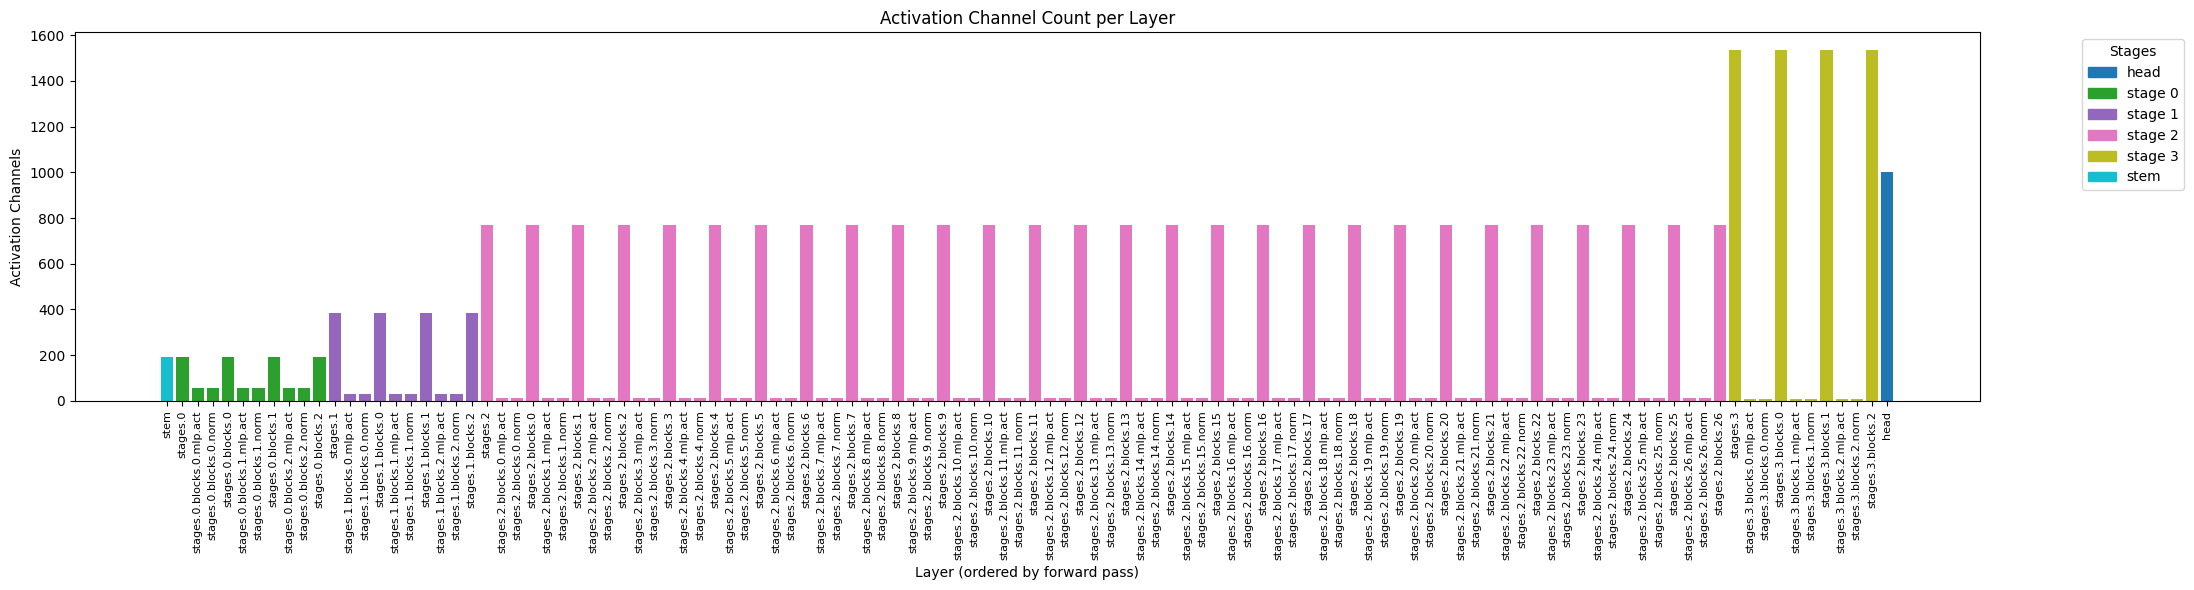

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from neuroai_kit.electrode import NeuroElectrodeArray

# -------------------------
# 1. Define and flatten layer names
# -------------------------
layers = []

# Add stem layer
layers.append('stem')

# Add stages and block-level layers
for stage_idx in range(4):  # stages 0,1,2,3
    stage_name = f"stages.{stage_idx}"
    layers.append(stage_name)  # include the entire stage if desired

    # Determine the number of blocks: stage 2 has 27 blocks, others have 3 blocks each.
    num_blocks = 27 if stage_idx == 2 else 3
    for block_idx in range(num_blocks):
        block_prefix = f"{stage_name}.blocks.{block_idx}"
        # Add key activation points in the block (MLP activation, normalization, and block output)
        layers.append(f"{block_prefix}.mlp.act")
        layers.append(f"{block_prefix}.norm")
        layers.append(block_prefix)

# Add the head of the model
layers.append('head')

# -------------------------
# 2. Verify modules exist
# -------------------------
# Assume underlying_model is your PyTorch model, e.g.:
underlying_model = convnext_large.activations_model._model  # adjust as needed

model_modules = dict(underlying_model.named_modules())
for layer in layers:
    if layer not in model_modules:
        print(f"Warning: {layer} not found in the model!")

# -------------------------
# 3. Extract activations using NeuroElectrodeArray
# -------------------------
input_tensor = torch.randn(1, 3, 224, 224)

with NeuroElectrodeArray(underlying_model, layers=layers) as electrode:
    activations = electrode(input_tensor)

# -------------------------
# 4. Prepare data for visualization
# -------------------------
layer_names = list(activations.keys())
channel_counts = []
# Also determine the stage for color-coding:
stages = []

for name in layer_names:
    shape = activations[name].shape
    # We assume activations are either 4D ([batch, channels, H, W]) or 2D ([batch, features])
    ch = shape[1] if len(shape) >= 2 else 0
    channel_counts.append(ch)
    
    # Determine stage based on name:
    if name.startswith("stem"):
        stages.append("stem")
    elif "stages.0" in name:
        stages.append("stage 0")
    elif "stages.1" in name:
        stages.append("stage 1")
    elif "stages.2" in name:
        stages.append("stage 2")
    elif "stages.3" in name:
        stages.append("stage 3")
    elif name.startswith("head"):
        stages.append("head")
    else:
        stages.append("other")

# Map each stage to a color using a colormap:
unique_stages = sorted(list(set(stages)))
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_stages)))
stage_color_map = dict(zip(unique_stages, colors))
layer_colors = [stage_color_map[s] for s in stages]

# -------------------------
# 5. Create the visualization
# -------------------------
plt.figure(figsize=(20, 6))
plt.bar(range(len(channel_counts)), channel_counts, color=layer_colors)
plt.xlabel("Layer (ordered by forward pass)")
plt.ylabel("Activation Channels")
plt.title("Activation Channel Count per Layer")

# Optionally, add layer names as x-tick labels (rotated for readability)
plt.xticks(range(len(channel_counts)), layer_names, rotation=90, fontsize=8)
plt.tight_layout()

# Create a legend for stages
handles = [plt.Rectangle((0, 0), 1, 1, color=stage_color_map[s]) for s in unique_stages]
plt.legend(handles, unique_stages, title="Stages", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [22]:
import torch
# Get the underlying PyTorch model from the wrapper
underlying_model = convnext_large.activations_model._model  # Note the underscore in _model

# Now use the NeuroElectrodeArray with the unwrapped model
from neuroai_kit.electrode import NeuroElectrodeArray

# # Define the layers you want to extract
# layers = [
#     'stem',
#     'stages.0',
#     'stages.1',
#     'stages.2',
#     'stages.3',
#     'head'
#     # Add more specific layers as needed
# ]
layers = {
#     'stem': 'stem',
#     'stages': ['stages.0', 'stages.1', 'stages.2', 'stages.3'],
#     'blocks': {
#         'stages.0': [f'stages.0.blocks.{i}' for i in range(3)],
#         'stages.1': [f'stages.1.blocks.{i}' for i in range(3)],
#         'stages.2': [f'stages.2.blocks.{i}' for i in range(27)],
#         'stages.3': [f'stages.3.blocks.{i}' for i in range(3)]
#     },
#     'head': 'head'
# }
# Create input tensor for testing
input_tensor = torch.randn(1, 3, 224, 224)

# Extract activations using the electrode
with NeuroElectrodeArray(underlying_model, layers=layers) as electrode:
    activations = electrode(input_tensor)

# Now you can access the activations
for layer_name, activation in activations.items():
    print(f"Layer: {layer_name}, Shape: {activation.shape}")

KeyError: 'blocks'

In [1]:
print(convnext_large.layers)

NameError: name 'convnext_large' is not defined

# downloading raw

In [48]:
from urllib.request import urlopen
from PIL import Image
import timm

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model(
    'convnext_large_mlp.clip_laion2b_augreg_ft_in1k_384',
    pretrained=True,
    features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 192, 96, 96])
    #  torch.Size([1, 384, 48, 48])
    #  torch.Size([1, 768, 24, 24])
    #  torch.Size([1, 1536, 12, 12])

    print(o.shape)


torch.Size([1, 192, 96, 96])
torch.Size([1, 384, 48, 48])
torch.Size([1, 768, 24, 24])
torch.Size([1, 1536, 12, 12])


In [88]:
for name, module in model.named_modules():
    print(name)
    # print(module)


stem_0
stem_1
stages_0
stages_0.downsample
stages_0.blocks
stages_0.blocks.0
stages_0.blocks.0.conv_dw
stages_0.blocks.0.norm
stages_0.blocks.0.mlp
stages_0.blocks.0.mlp.fc1
stages_0.blocks.0.mlp.act
stages_0.blocks.0.mlp.drop1
stages_0.blocks.0.mlp.norm
stages_0.blocks.0.mlp.fc2
stages_0.blocks.0.mlp.drop2
stages_0.blocks.0.shortcut
stages_0.blocks.0.drop_path
stages_0.blocks.1
stages_0.blocks.1.conv_dw
stages_0.blocks.1.norm
stages_0.blocks.1.mlp
stages_0.blocks.1.mlp.fc1
stages_0.blocks.1.mlp.act
stages_0.blocks.1.mlp.drop1
stages_0.blocks.1.mlp.norm
stages_0.blocks.1.mlp.fc2
stages_0.blocks.1.mlp.drop2
stages_0.blocks.1.shortcut
stages_0.blocks.1.drop_path
stages_0.blocks.2
stages_0.blocks.2.conv_dw
stages_0.blocks.2.norm
stages_0.blocks.2.mlp
stages_0.blocks.2.mlp.fc1
stages_0.blocks.2.mlp.act
stages_0.blocks.2.mlp.drop1
stages_0.blocks.2.mlp.norm
stages_0.blocks.2.mlp.fc2
stages_0.blocks.2.mlp.drop2
stages_0.blocks.2.shortcut
stages_0.blocks.2.drop_path
stages_1
stages_1.downsam

In [ ]:
dict([*model.named_modules()])

In [81]:
def save_outputs_hook(layer_id):
    def detach(output):
        if isinstance(output, tuple): return tuple([o.detach() for o in output])
        elif isinstance(output, list): return [o.detach() for o in output]
        else: return output.detach()

In [85]:
layer = dict([*model.named_modules()])['stages_2.blocks.4.conv_dw']
layer.register_forward_hook(save_outputs_hook('stages_2.blocks.4.conv_dw'))

In [25]:
print(type(convnext_large.activations_model))
print(dir(convnext_large.activations_model))

<class 'brainscore_vision.model_helpers.activations.pytorch.PytorchWrapper'>
['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_extractor', '_device', '_extractor', '_forward_kwargs', '_model', '_output_layer', '_tensor_to_numpy', 'from_paths', 'from_stimulus_set', 'get_activations', 'get_layer', 'graph', 'identifier', 'layers', 'register_batch_activations_hook', 'register_hook', 'register_stimulus_set_hook']


In [64]:
print(convnext_large.layers)

['stages.2.blocks.4.conv_dw', 'stages.2.blocks.3', 'stages.2.blocks.4.conv_dw', 'stages.2.downsample.1', 'head.pre_logits']


In [62]:
import torch 
print(isinstance(convnext_large.activations_model, torch.nn.Module))


False


In [35]:
import neuroai_kit as nk
from neuroai_kit import model_utils
from neuroai_kit.electrode import NeuroElectrodeArray

layers = {
    'stem': 'stem',
    'stages': ['stages.0', 'stages.1', 'stages.2', 'stages.3'],
    'blocks': {
        'stages.0': [f'stages.0.blocks.{i}' for i in range(3)],
        'stages.1': [f'stages.1.blocks.{i}' for i in range(3)],
        'stages.2': [f'stages.2.blocks.{i}' for i in range(27)],
        'stages.3': [f'stages.3.blocks.{i}' for i in range(3)]
    },
    'head': 'head'
}


In [38]:
import torch
import neuroai_kit as nk
from neuroai_kit.electrode import NeuroElectrodeArray

# Define your custom subclass that overrides hook_layers
class CustomNeuroElectrodeArray(NeuroElectrodeArray):
    def hook_layers(self):
        # Remove any existing hooks
        self.remove_hooks()
        # Instead of iterating over named_modules(), use your model's get_layer method
        for layer_id in self.layers:
            try:
                layer = self.model.get_layer(layer_id)
            except Exception as e:
                raise AttributeError(f"Could not get layer '{layer_id}' using get_layer: {e}")
            self.hooks[layer_id] = layer.register_forward_hook(self.save_outputs_hook(layer_id))

# Now define your layers dictionary manually. Adjust block counts to match your architecture.
layers = {
    'stem': 'stem',
    'stages': ['stages.0', 'stages.1', 'stages.2', 'stages.3'],
    'blocks': {
        'stages.0': [f'stages.0.blocks.{i}' for i in range(3)],
        'stages.1': [f'stages.1.blocks.{i}' for i in range(3)],
        'stages.2': [f'stages.2.blocks.{i}' for i in range(27)],
        'stages.3': [f'stages.3.blocks.{i}' for i in range(3)]
    },
    'head': 'head'
}

# Depending on how your model expects layer names, you might need to flatten the dictionary.
# One simple strategy is to merge the keys into one list. For example:
custom_layer_names = []

# Add stem
custom_layer_names.append(layers['stem'])

# Add each stage and its blocks
for stage in layers['stages']:
    custom_layer_names.append(stage)
    # Add blocks for the stage (if defined)
    if stage in layers['blocks']:
        custom_layer_names.extend(layers['blocks'][stage])

# Add head
custom_layer_names.append(layers['head'])

# Create a dummy input tensor (adjust shape as needed)
input_tensor = torch.randn(1, 3, 224, 224)

# Now use your custom electrode class.
with CustomNeuroElectrodeArray(convnext_large, layers=custom_layer_names) as electrode:
    activations = electrode(input_tensor)

# Print activation shapes
print("Activation shapes:")
for layer_name, activation in activations.items():
    print(f"{layer_name}: {activation.shape}")


AttributeError: Could not get layer 'stem' using get_layer: 'ModelCommitment' object has no attribute 'get_layer'

In [39]:
import torch
import torch.nn as nn
from neuroai_kit.electrode import NeuroElectrodeArray

# -----------------------------------------------------------------------------
# Option 2: Custom NeuroElectrodeArray that uses a manual mapping
# -----------------------------------------------------------------------------

class CustomNeuroElectrodeArray(NeuroElectrodeArray):
    """
    A subclass that overrides hook_layers() to use a manual mapping of
    layer names to actual layer objects.
    
    Parameters:
      model: The wrapped model.
      layer_mapping: A dict mapping layer names (str) to layer objects (nn.Module).
      Other keyword arguments are passed to the parent class.
    """
    def __init__(self, model, layer_mapping, **kwargs):
        # Override layers with the keys of our manual mapping.
        super().__init__(model, layers=list(layer_mapping.keys()), **kwargs)
        self.layer_mapping = layer_mapping

    def hook_layers(self):
        self.remove_hooks()
        # Instead of using model.named_modules(), iterate over our manual mapping.
        for layer_id, layer_obj in self.layer_mapping.items():
            if layer_obj is None:
                raise AttributeError(f"Layer object for key '{layer_id}' is None. "
                                     "Check your layer_mapping.")
            self.hooks[layer_id] = layer_obj.register_forward_hook(self.save_outputs_hook(layer_id))


# -----------------------------------------------------------------------------
# Manual layer mapping (replace this with your actual code to obtain layers)
# -----------------------------------------------------------------------------
#
# In this example we assume you have some way to retrieve each layer.
# For demonstration, we assume your convnext_large object has a custom attribute
# (for example, convnext_large.custom_layers) that maps string names to layer objects.
#
# If your model does not provide this, you need to obtain the layer objects manually.
#
# For example, if you know the architecture, you might do something like this:
#
#    layer_mapping = {
#         'stem': convnext_large.custom_layers['stem'],
#         'stages.0': convnext_large.custom_layers['stages.0'],
#         'stages.0.blocks.0': convnext_large.custom_layers['stages.0.blocks.0'],
#         ...
#         'head': convnext_large.custom_layers['head']
#    }
#
# The following code is pseudocode; adjust the layer counts and retrieval as needed.

layer_mapping = {}

# Example: assume convnext_large has an attribute 'custom_layers' (this is hypothetical)
if hasattr(convnext_large, 'custom_layers'):
    # Stem layer
    layer_mapping['stem'] = convnext_large.custom_layers.get('stem', None)
    
    # Suppose there are 4 stages: stage 0, 1, 2, and 3.
    for stage_idx in range(4):
        stage_name = f'stages.{stage_idx}'
        layer_mapping[stage_name] = convnext_large.custom_layers.get(stage_name, None)
        # Example: Stage 2 has 27 blocks, others have 3 blocks (adjust as needed)
        num_blocks = 27 if stage_idx == 2 else 3
        for block_idx in range(num_blocks):
            block_name = f'{stage_name}.blocks.{block_idx}'
            layer_mapping[block_name] = convnext_large.custom_layers.get(block_name, None)
    
    # Head layer
    layer_mapping['head'] = convnext_large.custom_layers.get('head', None)
else:
    # If your model does not have 'custom_layers', you must create the mapping manually.
    # For example, if you somehow know how to retrieve the layers:
    #
    #    layer_mapping['stem'] = <your code to get stem layer>
    #    layer_mapping['stages.0'] = <your code to get stage 0>
    #    layer_mapping['stages.0.blocks.0'] = <your code to get block 0 of stage 0>
    #    ...
    #
    # Here we set them to None to indicate you must fill these in.
    layer_mapping['stem'] = None
    for stage_idx in range(4):
        stage_name = f'stages.{stage_idx}'
        layer_mapping[stage_name] = None
        num_blocks = 27 if stage_idx == 2 else 3
        for block_idx in range(num_blocks):
            block_name = f'{stage_name}.blocks.{block_idx}'
            layer_mapping[block_name] = None
    layer_mapping['head'] = None

# (Optional) Print out the layer mapping keys to verify:
print("Defined layer mapping keys:")
for key in layer_mapping.keys():
    print(key)

# -----------------------------------------------------------------------------
# Create an input tensor and extract activations using the custom electrode.
# -----------------------------------------------------------------------------

input_tensor = torch.randn(1, 3, 224, 224)

with CustomNeuroElectrodeArray(convnext_large, layer_mapping=layer_mapping) as electrode:
    activations = electrode(input_tensor)

# Print out activation shapes.
print("Activation shapes:")
for layer_name, activation in activations.items():
    print(f"{layer_name}: {activation.shape}")


Defined layer mapping keys:
stem
stages.0
stages.0.blocks.0
stages.0.blocks.1
stages.0.blocks.2
stages.1
stages.1.blocks.0
stages.1.blocks.1
stages.1.blocks.2
stages.2
stages.2.blocks.0
stages.2.blocks.1
stages.2.blocks.2
stages.2.blocks.3
stages.2.blocks.4
stages.2.blocks.5
stages.2.blocks.6
stages.2.blocks.7
stages.2.blocks.8
stages.2.blocks.9
stages.2.blocks.10
stages.2.blocks.11
stages.2.blocks.12
stages.2.blocks.13
stages.2.blocks.14
stages.2.blocks.15
stages.2.blocks.16
stages.2.blocks.17
stages.2.blocks.18
stages.2.blocks.19
stages.2.blocks.20
stages.2.blocks.21
stages.2.blocks.22
stages.2.blocks.23
stages.2.blocks.24
stages.2.blocks.25
stages.2.blocks.26
stages.3
stages.3.blocks.0
stages.3.blocks.1
stages.3.blocks.2
head


AttributeError: Layer object for key 'stem' is None. Check your layer_mapping.

In [40]:
import torch

# Create an input tensor (adjust shape as needed)
input_tensor = torch.randn(1, 3, 224, 224)

# This dictionary will collect activations by layer name.
activations = {}

# Define a hook function that stores the output in the activations dict.
def hook_fn(name):
    def hook(module, inp, out):
        activations[name] = out
        print(f"Hook for {name}: output shape {out.shape}")
    return hook

# Print out the available layer names (these are provided by the wrapper)
print("Available layers from convnext_large.layers:")
for layer_name in convnext_large.layers:
    print(layer_name)

# Register hooks for each available layer using the wrapper's register_hook method.
for layer_name in convnext_large.layers:
    convnext_large.register_hook(layer_name, hook_fn(layer_name))

# Run a forward pass through the model.
_ = convnext_large(input_tensor)

# Print out the collected activation shapes.
print("\nCollected activations:")
for name, act in activations.items():
    print(f"{name}: {act.shape}")


Available layers from convnext_large.layers:
stages.2.blocks.4.conv_dw
stages.2.blocks.3
stages.2.blocks.4.conv_dw
stages.2.downsample.1
head.pre_logits


AttributeError: 'ModelCommitment' object has no attribute 'register_hook'

In [42]:
underlying_model = getattr(convnext_large, '_model', None)
if underlying_model is None:
    underlying_model = getattr(convnext_large, 'model', None)
if underlying_model is not None:
    for name, module in underlying_model.named_modules():
        print(name, module.__class__.__name__)
else:
    print("Could not find the underlying model!")


Could not find the underlying model!


In [37]:

with NeuroElectrodeArray(convnext_large, layers = layers) as electrode:
    activations = electrode(input_tensor)

AttributeError: 'ModelCommitment' object has no attribute 'named_modules'

In [33]:
import neuroai_kit as nk
from neuroai_kit import model_utils
from neuroai_kit.electrode import NeuroElectrodeArray

# Define your layers dictionary as you intended:
layers = {
    'stem': True,
    'stages': list(range(len(convnext_large.stages))),
    'blocks': {
        stage_idx: list(range(len(stage.blocks)))
        for stage_idx, stage in enumerate(convnext_large.stages)
    },
    'head': True
}

# Using NeuroElectrodeArray directly:
with NeuroElectrodeArray(convnext_large, layers=layers) as electrode:
    activations = electrode(input_tensor)

AttributeError: 'ModelCommitment' object has no attribute 'stages'

In [21]:
for name, module in convnext_large.activations_model:
    print(name, module)


TypeError: 'PytorchWrapper' object is not iterable

In [ ]:
# context on how I previously accessed all activations
import neuroai_kit as nk
from neuroai_kit import model_utils

model = load_model(width = 'w1', task = 'supervised')
layer_names = model_utils.get_layers(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Load dataset
dataset_path = "s3://visionlab-litdata/exploring-objects-images/"

# moves imgs to GPU before running loops to extract activations
img_batch = load_data(dataset_path).to(device) # this moves images to GPU early
model.eval()
with torch.no_grad():    
    with nk.NeuroElectrodeArray(model, layer_names) as electrode:
        activations = electrode(img_batch)
for layer_name, act in activations.items():
    print(layer_name, act.shape)
# saving extraction activations for all layers using nk
all_activations = {}
for layer_name, act in activations.items():
    act_np = act.cpu().numpy() if act.is_cuda else act.numpy()
    if act_np.ndim > 2:
        act_np = act_np.reshape(act_np.shape[0], -1)
    all_activations[layer_name] = act_np

# Save all activations to a single npz file
output_file = os.path.join('activations', "all_layer_activations.npz")
np.savez_compressed(output_file, **all_activations)
print(f"Saved all activations in {output_file}")


In [ ]:
# function to extract all activations from all layers
def convnext_large_activations()

In [11]:
for i, block in enumerate(convnext_large.stages[0].blocks):
    print(f"Block {i}: {block}")

AttributeError: 'ModelCommitment' object has no attribute 'stages'

# raw model with no wrapper?

In [43]:
from neuroai_kit import model_utils

# Try to load the raw model (if the library supports a flag or a different function)
raw_model = model_utils.load_model('convnext_large_mlp:clip_laion2b_augreg_ft_in1k_384', raw=True)


AttributeError: module 'neuroai_kit.model_utils' has no attribute 'load_model'

In [44]:
print(convnext_large.activations_model )

ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=192, out_features=768, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Linear(in_features=768, out_features=192, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), g

In [ ]:
raw_model = convnext_large.activations_model  # This is the raw ConvNeXt model.
for name, module in raw_model.named_modules():
    print(name, module.__class__.__name__)


AttributeError: 'PytorchWrapper' object has no attribute 'model'

In [46]:
activations = convnext_large.get_activations(input_tensor)

AttributeError: 'ModelCommitment' object has no attribute 'get_activations'